In [92]:
from pyprojroot import here
import pandas as pd
from pathlib import Path
import json

from pprint import pprint

import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline
# up figure resolution
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

## Test drills

In [93]:
folder = here() / 'data/raw/fast-teams-twitter-data/01-etatyo/'
example_path = folder / "1237122416809295872.json"

with open (example_path, 'r') as f:
    file = json.load(f)

pprint(file.keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])


In [94]:
file['user']['screen_name']

'MarikaVanska'

In [95]:
file['entities']['user_mentions']

[{'screen_name': 'minnahuoti',
  'name': 'Minna Huotilainen',
  'id': 432396811,
  'id_str': '432396811',
  'indices': [3, 14]}]

## Inspector

In [96]:
data = pd.DataFrame()

pathlist = Path(folder).glob('*.json')
files = [x.name for x in pathlist]

drop = widgets.Dropdown(
            options=files,
            description='files',
            disabled=False,
    )
display(drop)

Dropdown(description='files', options=('1240556017949257728.json', '1240281984355774464.json', '12398153297879…

## Combine

In [97]:
tweets = list()
pathlist = Path(folder).glob('*.json')

for path in pathlist:
    print(path, end='\r')
    with open(path, 'r') as f:
        file = json.load(f)
        tweets.append(file)

## Network

In [98]:
# runvisualize.py

# # Looking into a tweet
# tweet = tweets['statuses'][0]
# print tweet['user']['screen_name']
# print tweet['entities']['user_mentions']
# for user in tweet['entities']['user_mentions']:
#   print user['screen_name']

# Tweets to tabular format
import pandas as pd
table = list()

import networkx as nx
network = nx.DiGraph()
print

for tweet in tweets:
  # print(tweet['full_text'])
  for mentioned in tweet['entities']['user_mentions']:
    user_from = tweet['user']['screen_name'].lower()
    user_to = mentioned['screen_name'].lower()
    if not network.has_edge(user_from,user_to):
        network.add_edge(user_from,user_to,weight=0)
    network[user_from][user_to]['weight'] += 1

nx.readwrite.gexf.write_gexf(network,
                            here() / 'results/network.gexf',
                            encoding='utf-8',
                            version='1.2draft')

# df = pd.DataFrame(rows)
# df.to_csv('data/tweets-6aika.csv',encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jalmarituominen/doctoral-project/twitter-project/results/figures/2020-03-20-network.png'

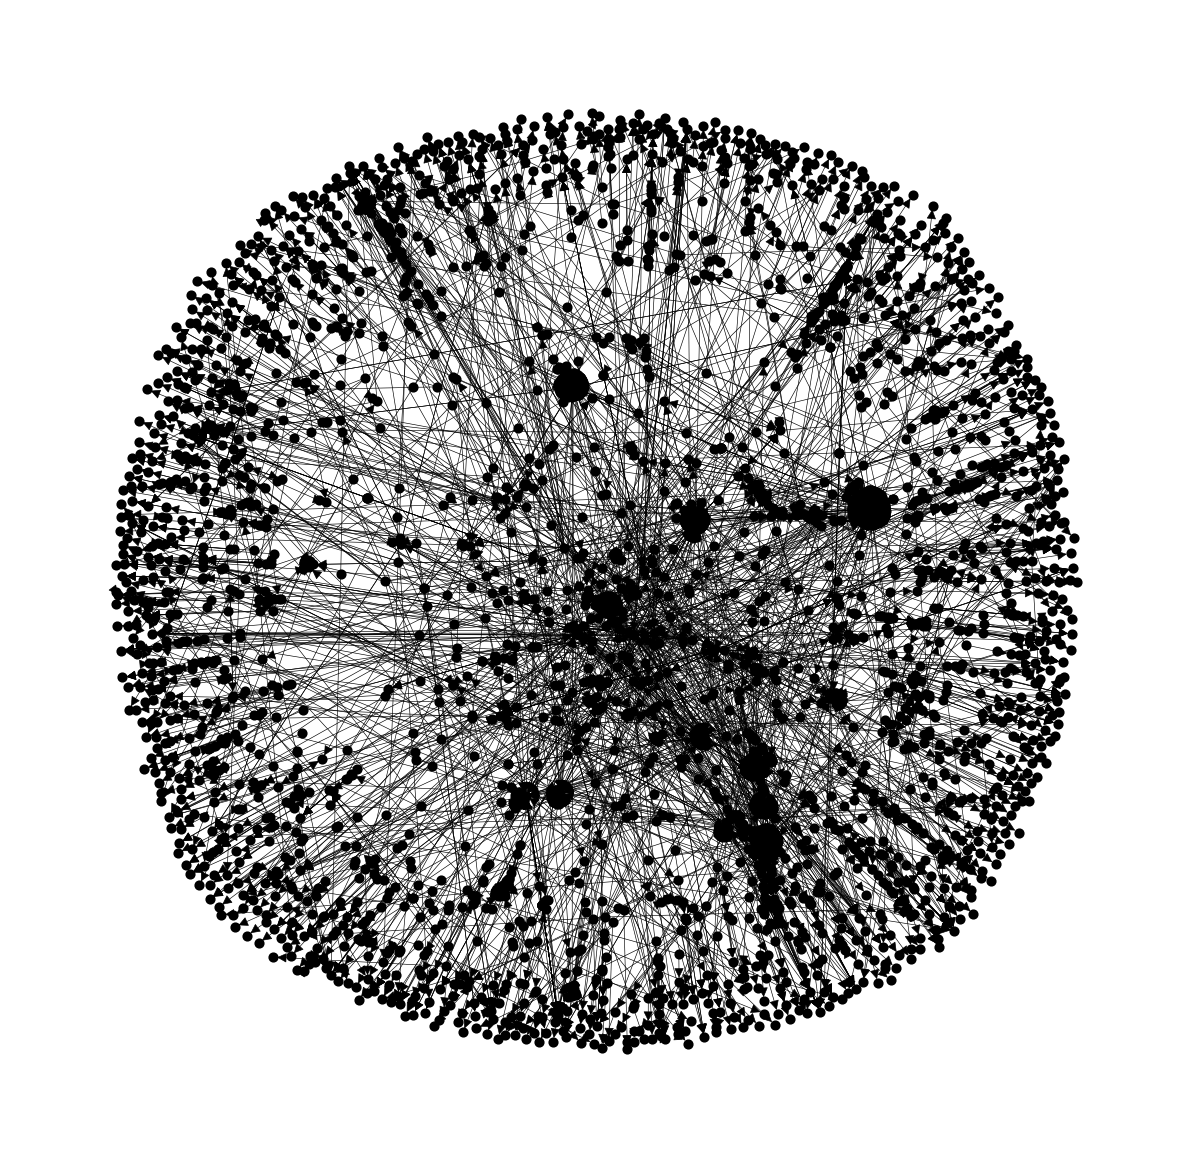

In [100]:
pos = nx.spring_layout(network)
plt.figure(figsize=(10,10))
nx.draw_networkx(network, with_labels=False, node_size=15, width=.3, pos=pos, edgecolor='grey', node_color='k')
limits=plt.axis('off') # turn of axisb
plt.savefig(here() / 'results/figures/2020-03-20-network.png')